# 2주차 스터디 과제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 생성과 회귀분석

* 데이터 생성을 이해해보고 직접 만들어보자
* 생성한 데이터의 회귀식을 구해보자


예시: 
$
Y = 0.5X + 2
$
/ x축은 -3에서 3까지의 구간으로 설정

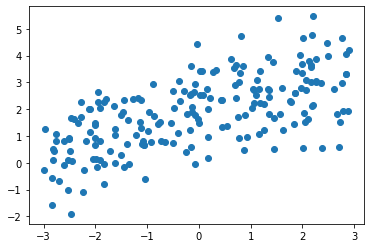

In [2]:
# 몇 개의 데이터를 생성할지 n으로 정한다 (ex. n=100이면 100개의 데이터 생성)
n = 200

# X축의 데이터를 생성한다. np.random.rand은 0과1사이의 랜덤한 값을 리턴한다. 
# -> 여기에 6를 곱하면 0과 6사이의 값으로 변한다(생각해보면 당연함) -> 이 값에다 3를 빼주면 -3와 3사이의 값으로 변한다!
X = 6 * np.random.rand(n,1) - 3

# 각 x값에 해당하는 y값 생성 + 랜덤한 잡음 추가
y = 0.5*X + 2 + np.random.randn(n,1)

# 그림으로 그려보자
plt.scatter(X,y);

**연습문제 1**

$
Y = 0.5X^2 + X + 2 
$

위 식을 따르면서, uniform 잡음을 추가한 -10<X<10 데이터를 생성 

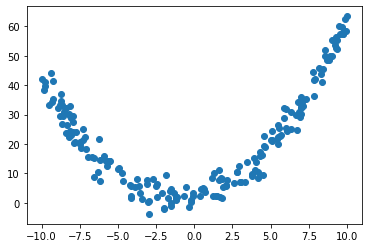

In [3]:
# 연습문제 1 풀이
n = 200

X = 20 * np.random.rand(n,1) - 10

                          # 잡음을 크게 주기 위해서 3을 곱해줬다
y = 0.5*X**2 + X + 2 + (3* np.random.randn(n,1))

plt.scatter(X,y);

**연습문제 2**

넘파이를 사용해서 연습문제 1에서 생성한 데이터(X,y)를 사용해서 회귀(Regression)를 해보자

* 2차식을 사용한 회귀를 해야함! (힌트: np.c_[np.ones((n,1)), X, X**2])

In [4]:
#  연습문제 2 풀이
n = 200

# 왜 이런 순서로 풀리는 지 설명해야 한다
X_b = np.c_[np.ones((n,1)), X,X**2]

theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta

array([[2.187488  ],
       [1.00565831],
       [0.49750138]])

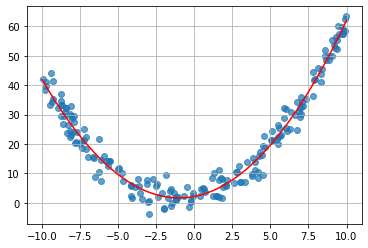

In [5]:
# 연습문제 2 시각화
X2 = np.linspace(-10,10,200)
X_b2 = np.c_[np.ones((200,1)), X2, X2**2]

fitted_value = X_b2.dot(theta)

# plot으로 나타내자
plt.scatter(X,y, alpha=0.7)
plt.plot(X2,fitted_value, c='r')
plt.grid();

**연습문제 3**

싸이킷런을 사용해 연습문제 1에서 생성한 데이터(X,y)를 회귀 해보자

In [6]:
# 연습문제 3 풀이
X_b3 = np.c_[X,X**2]

from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
linear_model.fit(X_b3,y)

print("회귀계수:", linear_model.coef_, ", 절편:",linear_model.intercept_)

sample=np.array([[5.0, 25.0]])

print("예측값:", linear_model.predict(sample)) 

# score의 경우 R^2값을 리턴한다.
linear_model.score(X_b3,y)

회귀계수: [[1.00565831 0.49750138]] , 절편: [2.187488]
예측값: [[19.65331413]]


0.9675556843033832

**연습문제 4**

Statsmodels를 사용해 연습문제 1에서 생성한 데이터(X,y)를 회귀하자
* 힌트는 연습문제 2와 동일함

In [7]:
# 연습문제 4 풀이
import statsmodels.api as sm

model=sm.OLS(y,X_b)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2937.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):          2.22e-147
Time:                        23:25:49   Log-Likelihood:                -506.31
No. Observations:                 200   AIC:                             1019.
Df Residuals:                     197   BIC:                             1029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1875      0.346      6.328      0.000       1.506       2.869
x1             1.0057      0.035     28.849      0.000       0.937       1.074
x2             0.4975      0.007     71.480      0.000       0.484       0.511
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.509
Skew:                          -0.070   Prob(JB):                        0.775
Kurtosis:                       2.796   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Real Dataset을 사용한 머신러닝(회귀)

* sklearn과 statsmodels을 사용하겠습니다

In [8]:
# 사용할 tips 데이터셋을 불러오겠습니다. (식사 후 팁을 얼마나 지불하였는 지에 대한 정보가 담겨있습니다)
import seaborn as sns
tips_df = sns.load_dataset("tips") 

# 문제를 간단하게 하기 위해서 필요한 특성만 가져오겠습니다
tips_df = tips_df[["total_bill","tip","sex","smoker","size"]]

# 데이터셋이 어떻게 생겼는지 확인합니다
print("Tips df의 크기: ", tips_df.shape)
tips_df.head()

Tips df의 크기:  (244, 5)


,total_bill,tip,sex,smoker,size
0,16.99,1.01,Female,No,2
1,10.34,1.66,Male,No,3
2,21.01,3.50,Male,No,3
3,23.68,3.31,Male,No,2
4,24.59,3.61,Female,No,4


**식사금액(total_bill), 성별(sex),흡연여부(smoker),식사인원수(size)가 주어졌을 때, 팁(tip)을 얼마나 지불했는지 예측하는 머신러닝(선형회귀)알고리즘을 짜보겠습니다!**

In [9]:
# 데이터 전처리
## sex와 smoker는 영어이기 때문에 컴퓨터가 알아들을 수 있는 숫자로 변경해 줘야 합니다!
## 간단하게 남자는0 여자는 1 / 비흡연자는 0 흡연자는 1로 바꾸겠습니다
tips_df["sex_01"] = tips_df['sex'].replace({"Male":0, 'Female':1})
tips_df["smoker_01"] = tips_df["smoker"].replace({"No":0, "Yes":1})

# sex_01과 smoker_01이 잘 생성된 것을 확인할 수 있습니다
tips_df.head()

,total_bill,tip,sex,smoker,size,sex_01,smoker_01
0,16.99,1.01,Female,No,2,1,0
1,10.34,1.66,Male,No,3,0,0
2,21.01,3.50,Male,No,3,0,0
3,23.68,3.31,Male,No,2,0,0
4,24.59,3.61,Female,No,4,1,0


In [10]:
# 싸이킷런 사용
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# fit(투입할 데이터, 예측할 정답) -> 이런식으로 넣어주면 됩니다 (머신러닝 용어로 투입할 데이터는 피처(feature), 정답은 레이블(label)이라고 합니다)
X = tips_df[["total_bill","sex_01","smoker_01","size"]].values
y = tips_df["tip"].values
model.fit(X,y)

LinearRegression()

In [11]:
# 결과를 확인해봅시다
print("회귀계수(기울기): ", model.coef_, ", 절편: ", model.intercept_) 
print("모델의 R^2 : ", model.score(X,y))

회귀계수(기울기):  [ 0.09410594  0.02726342 -0.08371135  0.18028013] , 절편:  0.6952285962069387
모델의 R^2 :  0.46876606416389666


In [12]:
# 류제현이라는 새로운 데이터를 통해 tip을 얼마나 낼지 예측해보겠습니다
## 20달러 식사, 남자, 비흡연, 총2명
je_hyeon = np.array([[20,0,0,2]])

model.predict(je_hyeon)
# 2.93달러를 낼 것 같다고 예측했습니다!

array([2.9379076])

**연습문제 5 - Statsmodels사용**

위에서 사용한 tips데이터셋(X,y)를 사용해서 Statsmodels를 사용한 회귀를 구현해 봅시다

In [13]:
# 연습문제 5 코드
import statsmodels.api as sm

# statsmodels은 절편항을 모델링하기 위해서 1을 추가해줘야 한다
X_b = np.c_[np.ones((len(X),1)), X]

model=sm.OLS(y,X_b)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     52.72
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           8.47e-32
Time:                        23:26:11   Log-Likelihood:                -347.78
No. Observations:                 244   AIC:                             705.6
Df Residuals:                     239   BIC:                             723.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6952      0.217      3.208      0.002       0.268       1.122
x1             0.0941      0.009      9.996      0.000       0.076       0.113
x2             0.0273      0.137      0.198      0.843      -0.243       0.298
x3            -0.0837      0.138     -0.605      0.546      -0.356       0.189
x4             0.1803      0.088      2.049      0.042       0.007       0.354
==============================================================================
Omnibus:                       26.891   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.438
Skew:                           0.589   Prob(JB):                     1.12e-11
Kurtosis:                       4.891   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**연습문제 6 - 싸이킷런 사용**

아래에 주어진 데이터셋(다이아몬드 데이터셋)을 이용해서 다이아몬드 가격을 예측하는 회귀식을 만들어 봅시다

* 본인이 원하는 만큼의 데이터 전처리를 수행하시면 됩니다 -> 전처리가 잘 될 수록 머신러닝 성능은 향상될 것 입니다

In [14]:
diamond_df = sns.load_dataset("diamonds")
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
# 연습문제 5 풀이

